Running the Test
At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:

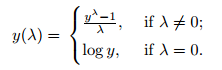

This test only works for positive data. However, Box and Cox did propose a second formula that can be used for negative y-values:

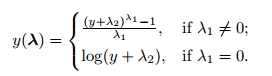


###### What is a Box Cox Transformation?
A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

#### Yeo Johnson Transform
The limitations of Box Cox transform which was that it didn’t work for negative numbers and zero was overcome by Yeo Johnson Transform

This transformation is somewhat of an adjustment to Box Cox transformation by which we can apply it to negative numbers as well as for zero

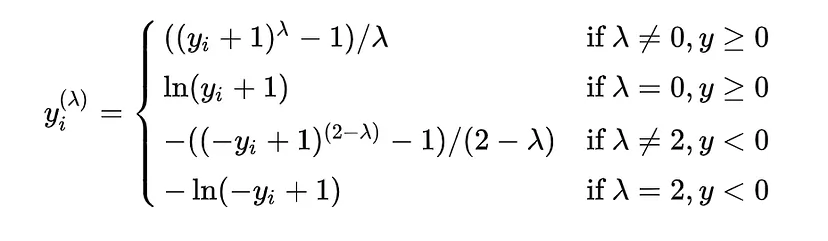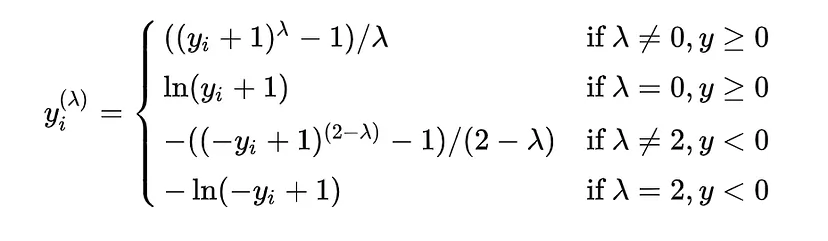

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer


In [23]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [25]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [26]:
df.shape

(1030, 9)

In [27]:
X=df.drop(columns=['Strength'])
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [28]:
y=df['Strength']
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314848

In [43]:
# cross validation
lr=LinearRegression()
print(np.mean(cross_val_score(lr,X,y,scoring='r2')))

0.46099404916628683


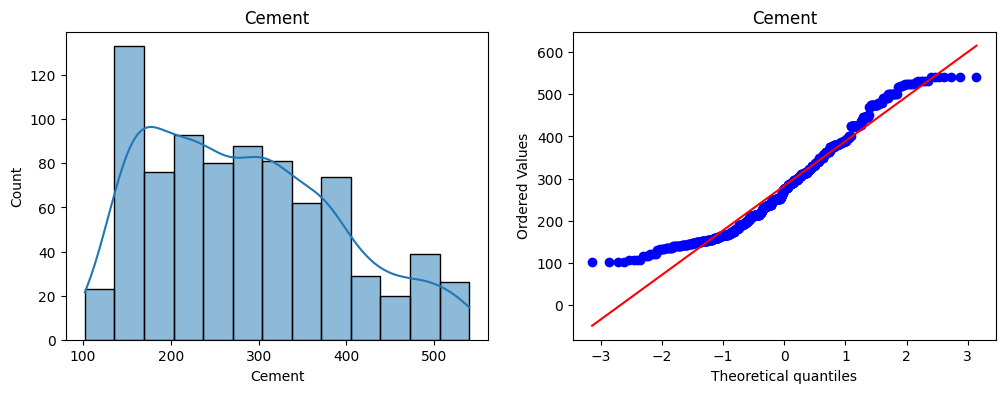

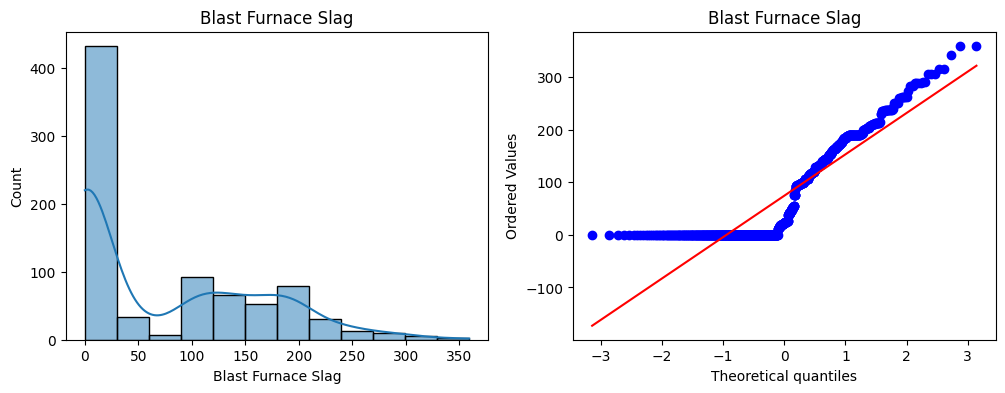

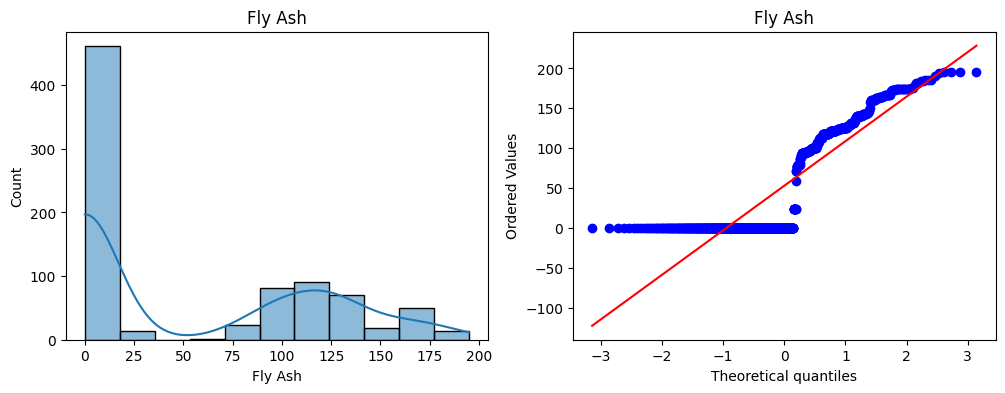

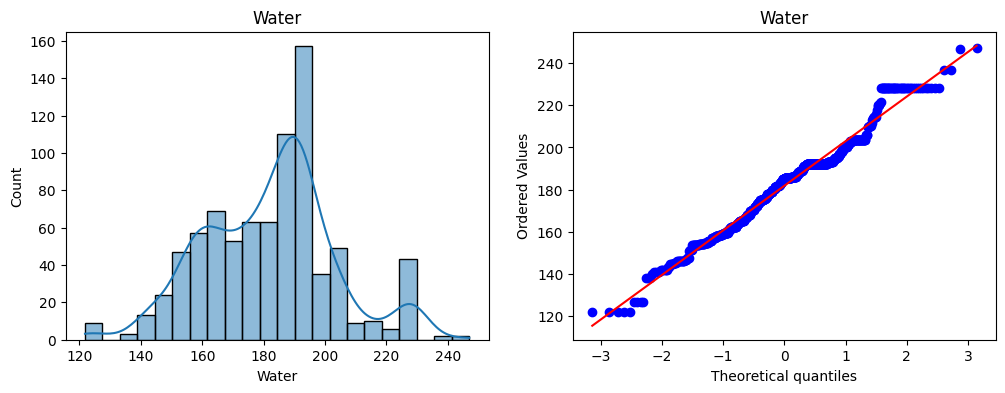

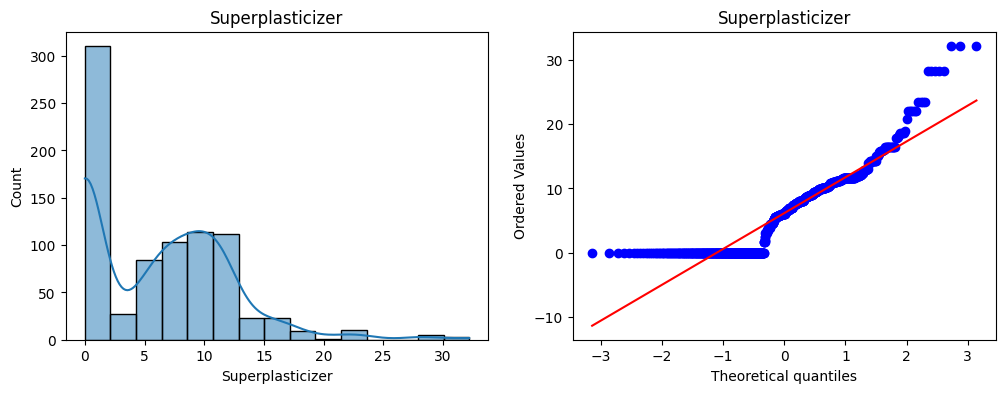

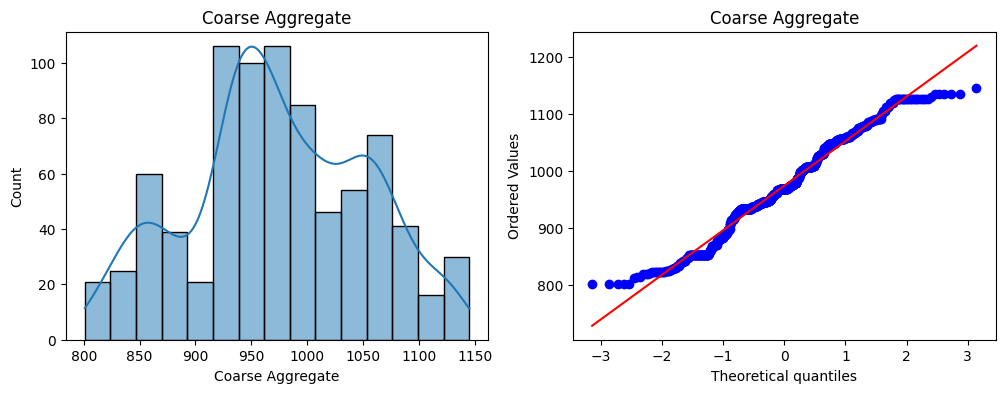

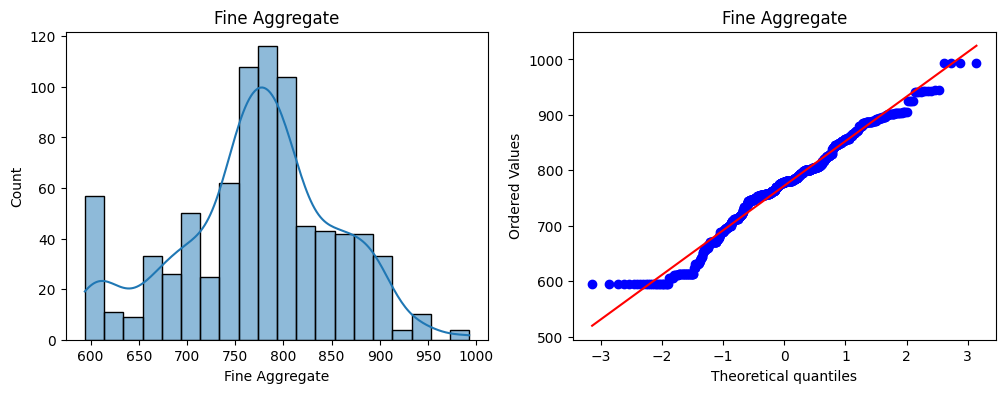

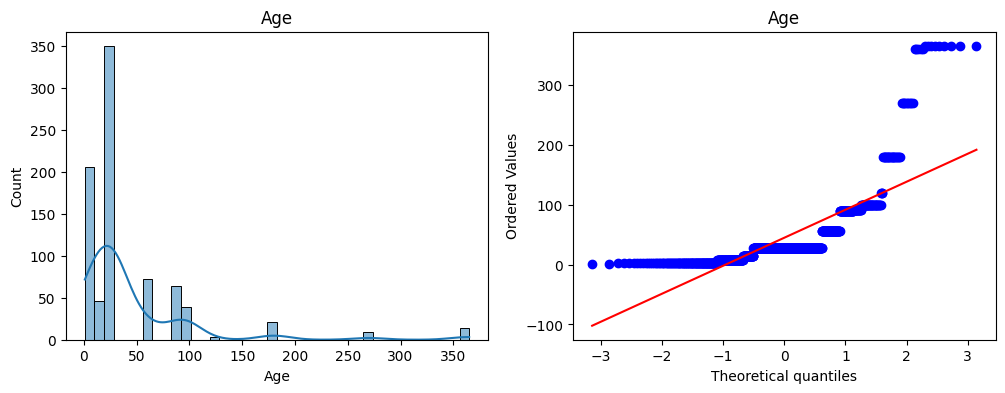

In [50]:
# plotting without any transformation 

for col in X_train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()

In [58]:
# Applying box ox transformation
pt=PowerTransformer(method='box-cox')
X_train_transform=pt.fit_transform(X_train+0.000001)
X_test_transform=pt.fit_transform(X_test+0.000001)


In [60]:
pd.DataFrame({'cols':X_train.columns,'Box-cox lambda':pt.lambdas_})

,cols,Box-cox lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [61]:
# Applying linear regression on a tranformed data
lr=LinearRegression()
lr.fit(X_train_transform,y_train)
y_pred1=lr.predict(X_test_transform)
r2_score(y_test,y_pred1)

0.8055321002541035

In [64]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
print(np.mean(cross_val_score(lr,X_transformed,y,scoring='r2')))

0.6658537935430975


In [112]:

def apply_transform(transform):
    pt = PowerTransformer(method=transform)  # Create PowerTransformer
    
    # Train Logistic Regression before transformation
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred2 = lr.predict(X_test)
    
    print("Before transform R2 Score:", r2_score(y_test, y_pred2))
    print("Before transform CV:", np.mean(cross_val_score(lr, X_train, y_train, scoring='r2')))

    print("-" * 50)
    
    # Apply transformation (fit on train, transform on both)
    X_train_transform = pt.fit_transform(X_train+0.000001)  
    X_test_transform = pt.transform(X_test+0.000001)  # Use transform() on test data
    
    # Train Logistic Regression after transformation
    lr.fit(X_train_transform, y_train)
    y_pred3 = lr.predict(X_test_transform)
    
    print("After transform R2 Score:", r2_score(y_test, y_pred3))
    print("After transform CV:", np.mean(cross_val_score(lr, X_train_transform, y_train, scoring='r2')))

    X_train_transformed = pd.DataFrame(X_train_transform, columns=X_train.columns)
    
    # Loop through each column
    for col in X_train.columns:
        plt.figure(figsize=(12, 5))
    
        # Before Transformation
        plt.subplot(121)
        sns.histplot(X_train[col], kde=True, bins=30)
        plt.title(f"{col} - Before Transformation")
    
        # After Transformation
        plt.subplot(122)
        sns.histplot(X_train_transformed[col], kde=True, bins=30)
        plt.title(f"{col} - After Transformation")
    
        plt.tight_layout()
        plt.show()

Before transform R2 Score: 0.6275531792314848
Before transform CV: 0.5946055391992532
--------------------------------------------------
After transform R2 Score: 0.8161906545593434
After transform CV: 0.7941782204797372


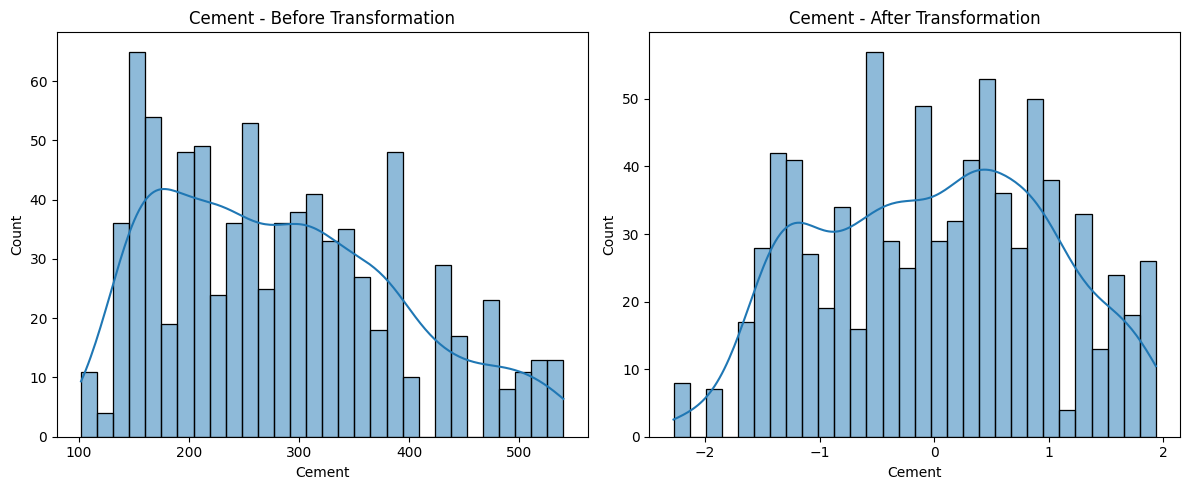

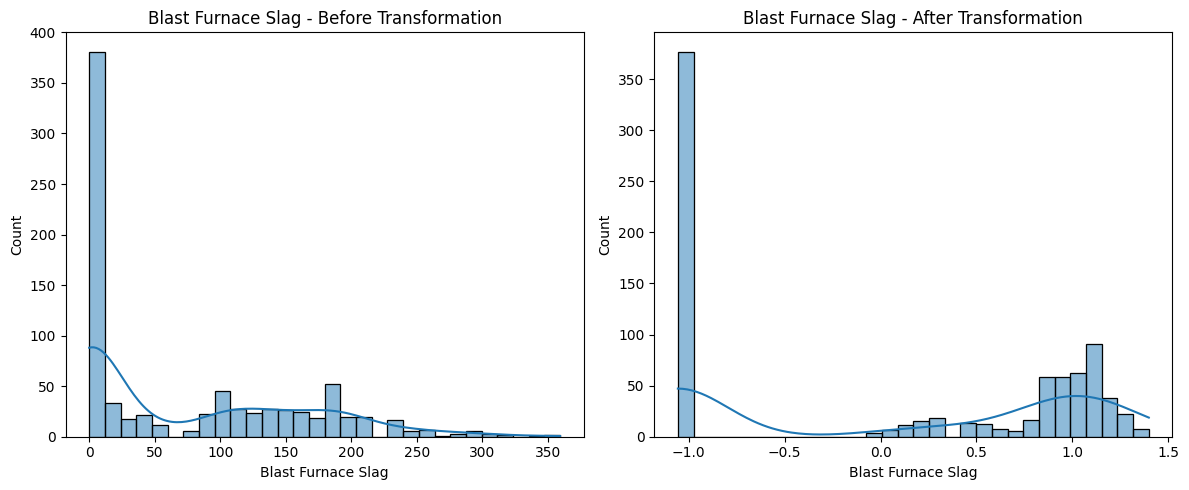

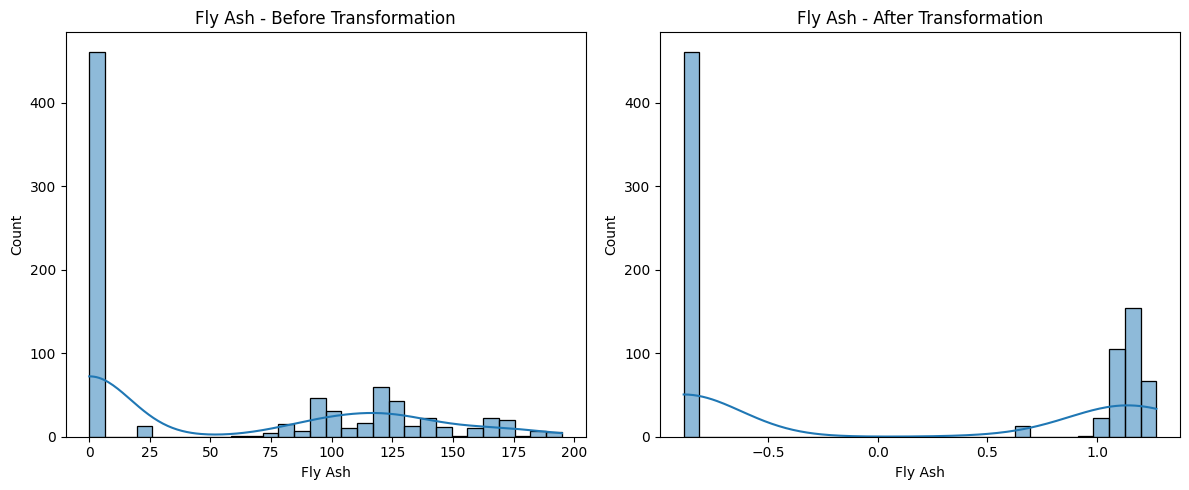

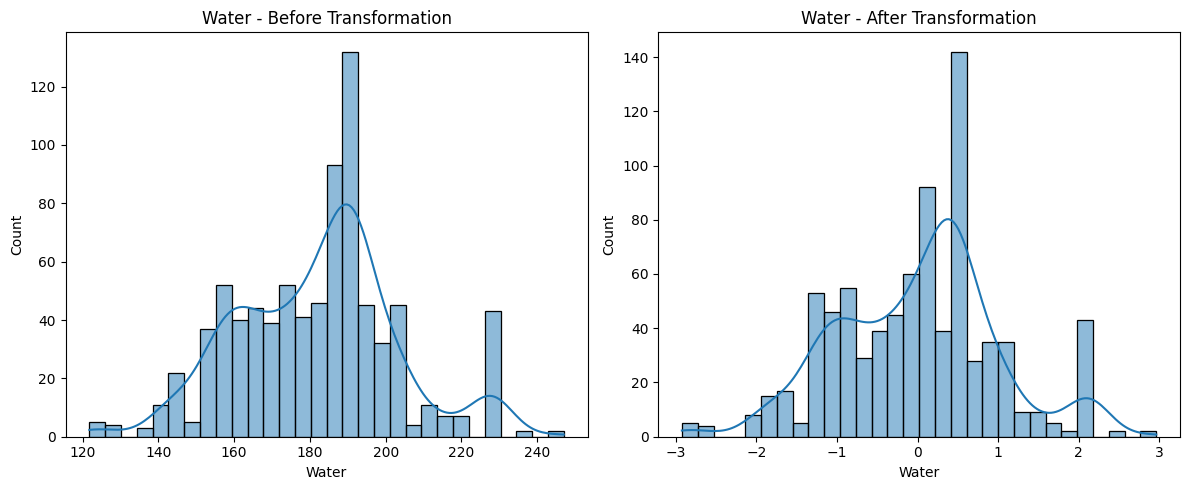

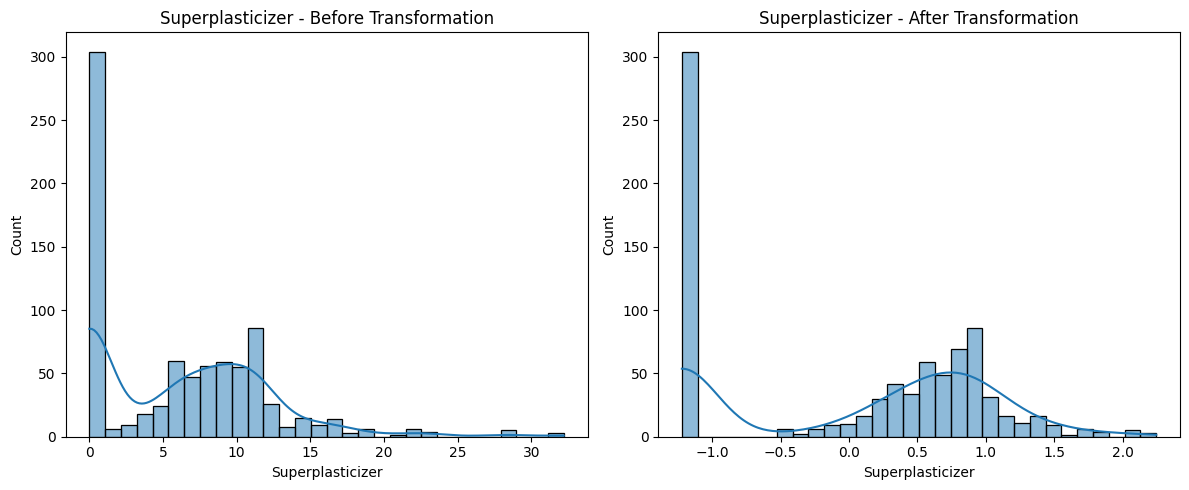

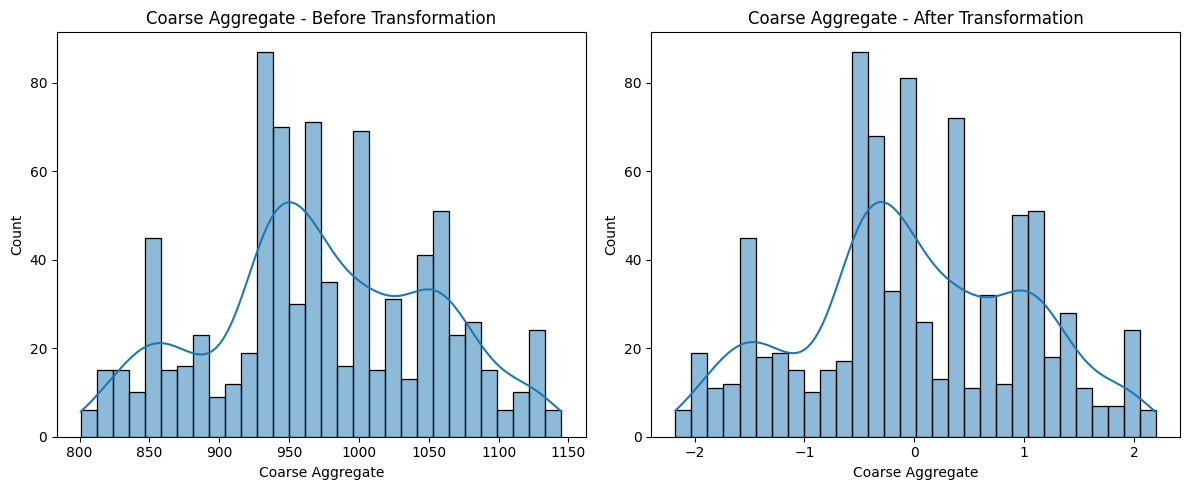

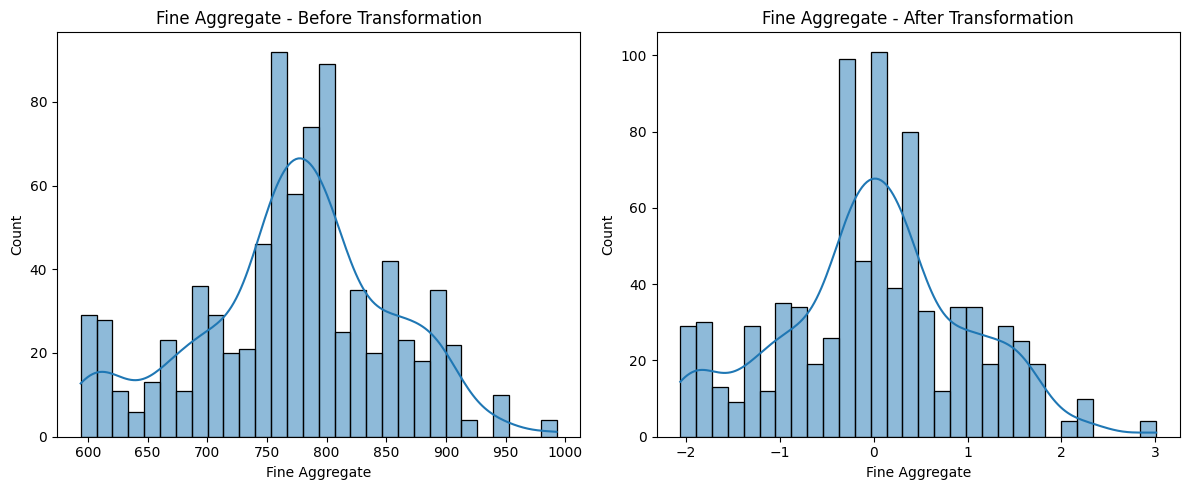

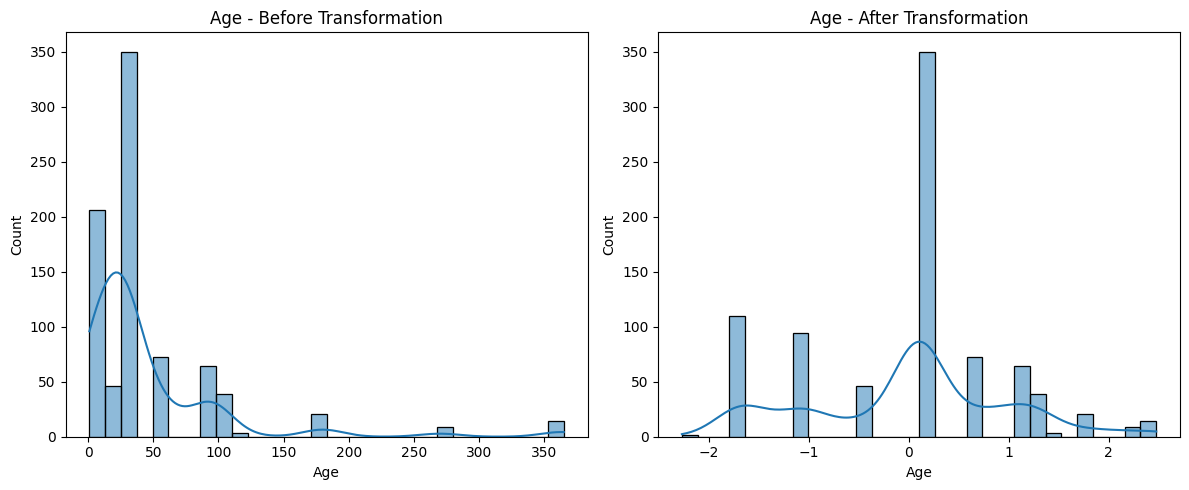

In [113]:
apply_transform('yeo-johnson')